510


Within epoch loss (validation) 0.19481: 100%|██████████| 111/111 [00:08<00:00, 12.45it/s]


model on GPU: False


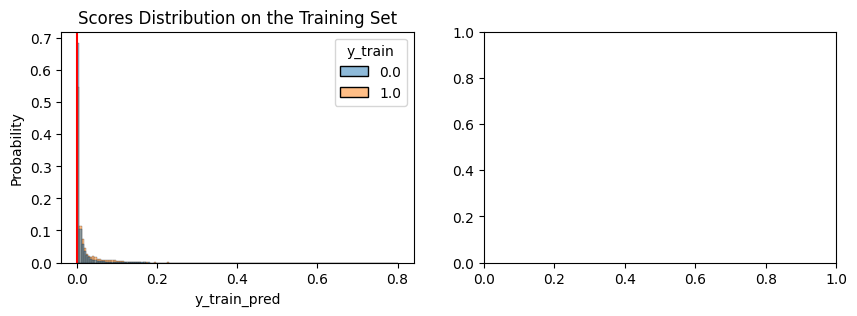

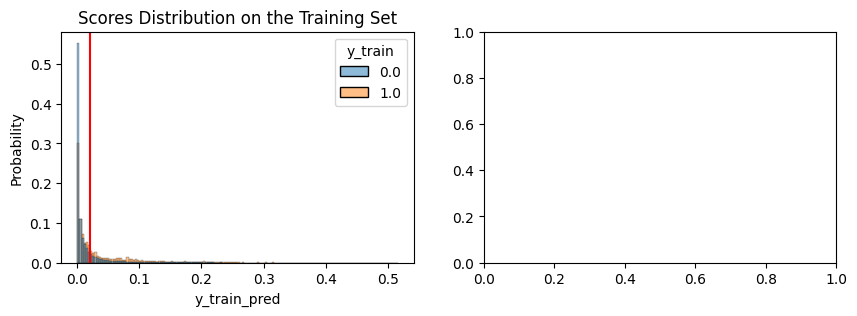

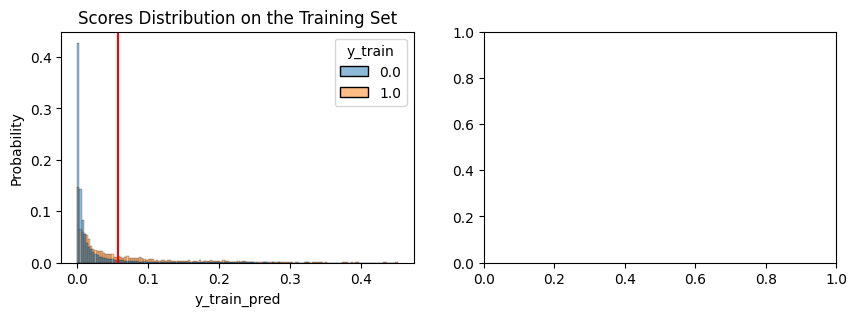

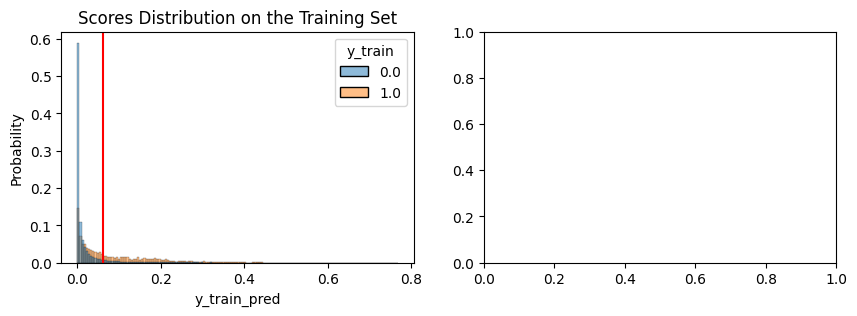

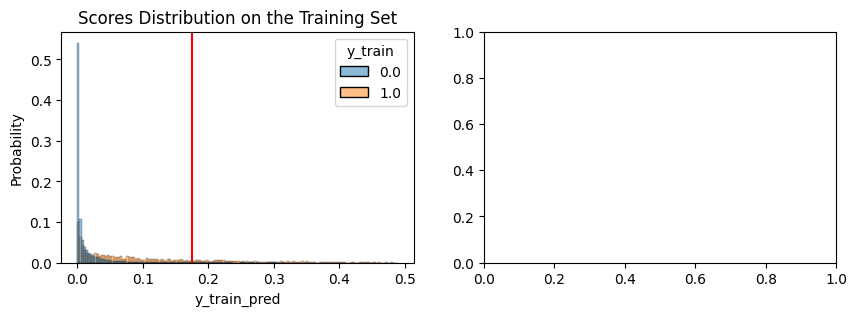

In [6]:
import os
import sys

import numpy as np
import pickle 

# import trainer
# PC
# sys.path.append('/home/david/Desktop/projects/thesis/downstream_classification')
# os.chdir('/home/david/Desktop/projects/thesis/downstream_classification')

# MAC
sys.path.append('/Users/davidharar/Documents/School/thesis/git_repositories/downstream_classification')
os.chdir('/Users/davidharar/Documents/School/thesis/git_repositories/downstream_classification')

from executors.train_on_local_machine_v2 import trainer

best_rocauc_and_pr_auc = {
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
np.random.seed(123)
seeds = np.random.randint(0,1000, 1)


for seed_ in seeds:
    print(seed_)
    
    # V9
    # -----------------
    config = {
        
        # general
        'seed': 123,
        # 'metadata_file_path': './data/combined_data/ptb_signal_level_metadata_with_label.csv',
        # 'data_folder_path': './data/ptb-ecg-processed-divided-into-450/',
        'metadata_file_path': './data/combined_data/china.csv',
        'data_folder_path': './data/china-processed_divided_into_450/',


        # training
        'batch_size': 128,
        'n_epochs': 10,
        'weight_decay': 0.3,
        'lr': 0.0005,
        'eval_metric':'aucpr',
        'patience':3,
        'predefined_device':'mps',

        # architecture
        'targets': ['AF'],
        'dropout': 0.5,
        'clip': 1,
        'scale':1,
        'depth': 1,
        
        # misc
        'model_saving_path': f'./models/AF-V10-different-seeds-china-clean',
        'verbosity':True,

        # test
        'check_on_test':True,
        
        # external data
        'internal_data':False
    }

    # run
    best_rocauc_and_pr_auc_seed = trainer(**config)
    

    best_rocauc_and_pr_auc['seed'].append(seed_)
    best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
    best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
    best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
    best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])
    
    with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
        pickle.dump(best_rocauc_and_pr_auc, f)

